In [172]:
import keras
from keras.datasets import cifar10
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
import os
import matplotlib.pyplot as plt

In [173]:
batch_size = 32
num_classes = 10
epochs = 50
num_predictions = 20

# The data, shuffled and split between train and test sets:
(x_train, y_train), (x_test, y_test) = cifar10.load_data()
print('x_train shape:', x_train.shape)
print(x_train.shape[0], 'train samples')
print(x_test.shape[0], 'test samples')


x_train shape: (50000, 32, 32, 3)
50000 train samples
10000 test samples


In [174]:
print(x_train[0])
print(y_train[0])
image_dictionary={0:'airplane',1:'automobile',2:'bird',3:'cat',
       4:'deer',5:'dog',6:'frog',7:'horse',8:'ship',9:'truck'}
print(image_dictionary[float(y_train[0])])

[[[ 59  62  63]
  [ 43  46  45]
  [ 50  48  43]
  ..., 
  [158 132 108]
  [152 125 102]
  [148 124 103]]

 [[ 16  20  20]
  [  0   0   0]
  [ 18   8   0]
  ..., 
  [123  88  55]
  [119  83  50]
  [122  87  57]]

 [[ 25  24  21]
  [ 16   7   0]
  [ 49  27   8]
  ..., 
  [118  84  50]
  [120  84  50]
  [109  73  42]]

 ..., 
 [[208 170  96]
  [201 153  34]
  [198 161  26]
  ..., 
  [160 133  70]
  [ 56  31   7]
  [ 53  34  20]]

 [[180 139  96]
  [173 123  42]
  [186 144  30]
  ..., 
  [184 148  94]
  [ 97  62  34]
  [ 83  53  34]]

 [[177 144 116]
  [168 129  94]
  [179 142  87]
  ..., 
  [216 184 140]
  [151 118  84]
  [123  92  72]]]
[6]
frog


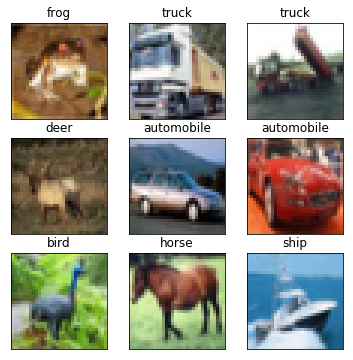

In [175]:
fig=plt.figure()
fig.set_size_inches(6,6)
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_train[i],cmap='binary')
    plt.title(image_dictionary[float(y_train[i])])
    plt.xticks([])
    plt.yticks([])
    
fig

In [176]:
print(y_train[0])
# Convert class vectors to binary class matrices.
y_train = keras.utils.to_categorical(y_train, num_classes)
y_test = keras.utils.to_categorical(y_test, num_classes)
print(y_train[0])
model = Sequential()
model.add(Conv2D(32, (3, 3), padding='same',
                 input_shape=x_train.shape[1:]))
model.add(Activation('relu'))
model.add(Conv2D(32, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), padding='same'))
model.add(Activation('relu'))
model.add(Conv2D(64, (3, 3)))
model.add(Activation('relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512))
model.add(Activation('relu'))
model.add(Dropout(0.5))
model.add(Dense(num_classes))
model.add(Activation('softmax'))

[6]
[ 0.  0.  0.  0.  0.  0.  1.  0.  0.  0.]


In [177]:
# 最佳化隨機梯度下降
opt = keras.optimizers.SGD(lr=0.01, decay=1e-6,
                           momentum=0.9, nesterov=True)
# 訓練模型 
model.compile(loss='categorical_crossentropy',
              optimizer=opt,
              metrics=['accuracy'])

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255

In [178]:
history=model.fit(x_train[:1000], y_train[:1000],
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test[:1000], y_test[:1000]),
              shuffle=True)

Train on 1000 samples, validate on 1000 samples
Epoch 1/50

1000/1000 [==============================] - ETA: 0s - loss: 2.3045 - acc: 0.1160 - val_loss: 2.2929 - val_acc: 0.1210
Epoch 2/50

1000/1000 [==============================] - ETA: 0s - loss: 2.2894 - acc: 0.1190 - val_loss: 2.2583 - val_acc: 0.1590
Epoch 3/50

1000/1000 [==============================] - ETA: 0s - loss: 2.1942 - acc: 0.1680 - val_loss: 2.4126 - val_acc: 0.1120
Epoch 4/50

1000/1000 [==============================] - ETA: 0s - loss: 2.3230 - acc: 0.0980 - val_loss: 2.2770 - val_acc: 0.1410
Epoch 5/50

1000/1000 [==============================] - ETA: 0s - loss: 2.2067 - acc: 0.1800 - val_loss: 2.1624 - val_acc: 0.2230
Epoch 6/50

1000/1000 [==============================] - ETA: 0s - loss: 2.1178 - acc: 0.2290 - val_loss: 2.0601 - val_acc: 0.2610
Epoch 7/50

  96/1000 [=>............................] - ETA: 5s - loss: 1.9588 - acc: 0.2500


1000/1000 [==============================] - ETA: 0s - loss: 2.0549 - acc: 0.2480 - val_loss: 2.2748 - val_acc: 0.2330
Epoch 8/50

1000/1000 [==============================] - ETA: 0s - loss: 2.0289 - acc: 0.2570 - val_loss: 2.0495 - val_acc: 0.2470
Epoch 9/50

1000/1000 [==============================] - ETA: 0s - loss: 2.0148 - acc: 0.2650 - val_loss: 1.9959 - val_acc: 0.2730
Epoch 10/50

1000/1000 [==============================] - ETA: 0s - loss: 1.9409 - acc: 0.2800 - val_loss: 2.5033 - val_acc: 0.2070
Epoch 11/50

1000/1000 [==============================] - ETA: 0s - loss: 1.9573 - acc: 0.2820 - val_loss: 1.9507 - val_acc: 0.3050
Epoch 12/50

1000/1000 [==============================] - ETA: 0s - loss: 1.9065 - acc: 0.3060 - val_loss: 2.0185 - val_acc: 0.2690
Epoch 13/50

 224/1000 [=====>........................] - ETA: 4s - loss: 1.9571 - acc: 0.2902


1000/1000 [==============================] - ETA: 0s - loss: 1.8804 - acc: 0.3030 - val_loss: 1.9714 - val_acc: 0.2820
Epoch 14/50

1000/1000 [==============================] - ETA: 0s - loss: 1.8509 - acc: 0.3200 - val_loss: 2.0989 - val_acc: 0.2420
Epoch 15/50

1000/1000 [==============================] - ETA: 0s - loss: 1.8156 - acc: 0.3270 - val_loss: 1.8619 - val_acc: 0.3180
Epoch 16/50

1000/1000 [==============================] - ETA: 0s - loss: 1.7648 - acc: 0.3600 - val_loss: 1.8426 - val_acc: 0.3310
Epoch 17/50

1000/1000 [==============================] - ETA: 0s - loss: 1.6836 - acc: 0.3920 - val_loss: 1.8428 - val_acc: 0.3450
Epoch 18/50

1000/1000 [==============================] - ETA: 0s - loss: 1.5992 - acc: 0.4220 - val_loss: 1.8220 - val_acc: 0.3500
Epoch 19/50

 352/1000 [=========>....................] - ETA: 3s - loss: 1.4915 - acc: 0.4261


1000/1000 [==============================] - ETA: 0s - loss: 1.5329 - acc: 0.4310 - val_loss: 1.8539 - val_acc: 0.3140
Epoch 20/50

1000/1000 [==============================] - ETA: 0s - loss: 1.4816 - acc: 0.4560 - val_loss: 1.8418 - val_acc: 0.3590
Epoch 21/50

1000/1000 [==============================] - ETA: 0s - loss: 1.4256 - acc: 0.4880 - val_loss: 1.7073 - val_acc: 0.3690
Epoch 22/50

1000/1000 [==============================] - ETA: 0s - loss: 1.3690 - acc: 0.4920 - val_loss: 1.7686 - val_acc: 0.3570
Epoch 23/50

1000/1000 [==============================] - ETA: 0s - loss: 1.2958 - acc: 0.5360 - val_loss: 1.7369 - val_acc: 0.3920
Epoch 24/50

1000/1000 [==============================] - ETA: 0s - loss: 1.2184 - acc: 0.5650 - val_loss: 1.8130 - val_acc: 0.3590
Epoch 25/50

 480/1000 [=============>................] - ETA: 3s - loss: 1.0895 - acc: 0.6167


1000/1000 [==============================] - ETA: 0s - loss: 1.1483 - acc: 0.5990 - val_loss: 1.7689 - val_acc: 0.3660
Epoch 26/50

1000/1000 [==============================] - ETA: 0s - loss: 1.0830 - acc: 0.6270 - val_loss: 1.8549 - val_acc: 0.3910
Epoch 27/50

1000/1000 [==============================] - ETA: 0s - loss: 1.0477 - acc: 0.6290 - val_loss: 1.8602 - val_acc: 0.3830
Epoch 28/50

1000/1000 [==============================] - ETA: 0s - loss: 1.0075 - acc: 0.6350 - val_loss: 1.8565 - val_acc: 0.3870
Epoch 29/50

1000/1000 [==============================] - ETA: 0s - loss: 0.9175 - acc: 0.6680 - val_loss: 1.9018 - val_acc: 0.3860
Epoch 30/50

1000/1000 [==============================] - ETA: 0s - loss: 0.9204 - acc: 0.6650 - val_loss: 2.0316 - val_acc: 0.3630
Epoch 31/50

 608/1000 [=================>............] - ETA: 2s - loss: 0.8653 - acc: 0.6990


1000/1000 [==============================] - ETA: 0s - loss: 0.8811 - acc: 0.6860 - val_loss: 1.9838 - val_acc: 0.3720
Epoch 32/50

1000/1000 [==============================] - ETA: 0s - loss: 0.7658 - acc: 0.7370 - val_loss: 1.9907 - val_acc: 0.4050
Epoch 33/50

1000/1000 [==============================] - ETA: 0s - loss: 0.7054 - acc: 0.7350 - val_loss: 2.1764 - val_acc: 0.3910
Epoch 34/50

1000/1000 [==============================] - ETA: 0s - loss: 0.7181 - acc: 0.7350 - val_loss: 2.1381 - val_acc: 0.3920
Epoch 35/50

1000/1000 [==============================] - ETA: 0s - loss: 0.6373 - acc: 0.7760 - val_loss: 2.2582 - val_acc: 0.3700
Epoch 36/50

1000/1000 [==============================] - ETA: 0s - loss: 0.5394 - acc: 0.8240 - val_loss: 2.3167 - val_acc: 0.3930
Epoch 37/50

 736/1000 [=====================>........] - ETA: 1s - loss: 0.5918 - acc: 0.8071


1000/1000 [==============================] - ETA: 0s - loss: 0.5901 - acc: 0.8070 - val_loss: 2.1594 - val_acc: 0.3740
Epoch 38/50

1000/1000 [==============================] - ETA: 0s - loss: 0.4774 - acc: 0.8310 - val_loss: 2.5983 - val_acc: 0.3790
Epoch 39/50

1000/1000 [==============================] - ETA: 0s - loss: 0.5036 - acc: 0.8220 - val_loss: 2.3565 - val_acc: 0.3970
Epoch 40/50

1000/1000 [==============================] - ETA: 0s - loss: 0.4366 - acc: 0.8480 - val_loss: 2.3279 - val_acc: 0.4020
Epoch 41/50

1000/1000 [==============================] - ETA: 0s - loss: 0.4513 - acc: 0.8510 - val_loss: 2.5191 - val_acc: 0.3830
Epoch 42/50

1000/1000 [==============================] - ETA: 0s - loss: 0.4246 - acc: 0.8440 - val_loss: 2.5826 - val_acc: 0.3930
Epoch 43/50

 864/1000 [========================>.....] - ETA: 0s - loss: 0.3933 - acc: 0.8657


1000/1000 [==============================] - ETA: 0s - loss: 0.3832 - acc: 0.8700 - val_loss: 2.6543 - val_acc: 0.3860
Epoch 44/50

1000/1000 [==============================] - ETA: 0s - loss: 0.3467 - acc: 0.8830 - val_loss: 2.7430 - val_acc: 0.3950
Epoch 45/50

1000/1000 [==============================] - ETA: 0s - loss: 0.3900 - acc: 0.8590 - val_loss: 2.5859 - val_acc: 0.4030
Epoch 46/50

1000/1000 [==============================] - ETA: 0s - loss: 0.3606 - acc: 0.8850 - val_loss: 2.6589 - val_acc: 0.4100
Epoch 47/50

1000/1000 [==============================] - ETA: 0s - loss: 0.4094 - acc: 0.8650 - val_loss: 2.6522 - val_acc: 0.3910
Epoch 48/50

1000/1000 [==============================] - ETA: 0s - loss: 0.3600 - acc: 0.8780 - val_loss: 2.6140 - val_acc: 0.3970
Epoch 49/50

1000/1000 [==============================] - ETA: 0s - loss: 0.2689 - acc: 0.9190 - val_loss: 2.9761 - val_acc: 0.3970


Epoch 50/50

1000/1000 [==============================] - ETA: 0s - loss: 0.2405 - acc: 0.9100 - val_loss: 3.1695 - val_acc: 0.3720


In [179]:
# 測試資料.
scores = model.evaluate(x_test[:1000], y_test[:1000], verbose=1)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])


1000/1000 [==============================] - ETA: 0s
Test loss: 3.16952228546
Test accuracy: 0.372


In [180]:
print(history.history.keys())


dict_keys(['val_loss', 'val_acc', 'loss', 'acc'])


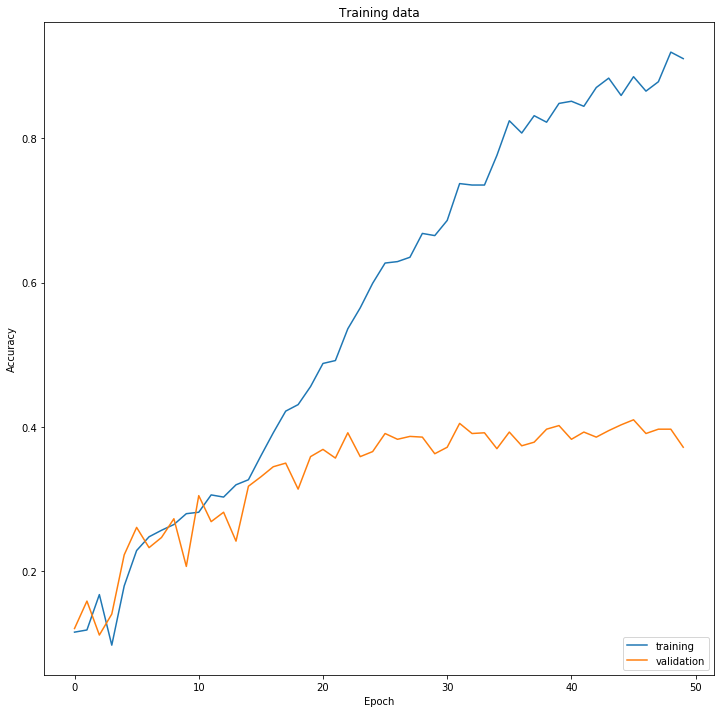

In [188]:
plt.clf()
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.title('Training data')
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.legend(['training','validation'],loc='lower right')
plt.show()
plt.clf()

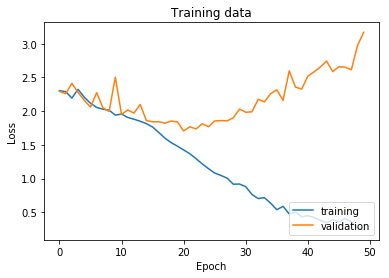

In [182]:
plt.clf()
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.title('Training data')
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['training','validation'],loc='lower right')
plt.show()

In [192]:

predicted_classes=model.predict_classes(x_test[:1000])


1000/1000 [==============================] - ETA: 0s


In [186]:
import numpy as np
np.argmax(y_test)
y_test[0]

array([ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.])

In [193]:
predicted_classes

array([5, 1, 8, 8, 4, 6, 3, 6, 6, 1, 0, 9, 6, 7, 6, 0, 5, 7, 8, 6, 6, 4, 4,
       9, 4, 5, 6, 0, 2, 6, 5, 4, 6, 6, 7, 6, 7, 9, 9, 2, 7, 2, 5, 6, 8, 9,
       6, 6, 2, 4, 9, 8, 5, 6, 8, 0, 7, 9, 2, 4, 4, 6, 6, 2, 6, 5, 9, 0, 3,
       7, 4, 6, 4, 8, 0, 4, 7, 3, 3, 1, 0, 1, 1, 5, 4, 7, 5, 4, 7, 9, 0, 7,
       1, 6, 4, 7, 6, 8, 2, 7, 4, 3, 6, 5, 1, 1, 6, 6, 3, 5, 3, 0, 4, 2, 1,
       5, 0, 4, 5, 4, 9, 5, 5, 4, 0, 6, 2, 3, 7, 6, 4, 9, 9, 7, 3, 6, 1, 0,
       4, 8, 2, 2, 4, 7, 1, 2, 6, 6, 6, 5, 1, 7, 6, 7, 0, 6, 4, 8, 5, 4, 2,
       1, 9, 2, 0, 7, 8, 6, 3, 0, 6, 6, 9, 8, 7, 9, 0, 4, 4, 9, 6, 0, 7, 4,
       4, 2, 4, 6, 5, 8, 6, 7, 3, 6, 7, 6, 6, 3, 5, 3, 5, 9, 0, 6, 9, 6, 0,
       5, 6, 9, 2, 2, 5, 2, 8, 0, 8, 9, 0, 4, 6, 4, 3, 6, 7, 9, 6, 6, 6, 6,
       5, 1, 4, 1, 0, 0, 4, 9, 6, 3, 1, 9, 7, 9, 0, 6, 4, 4, 5, 6, 2, 3, 6,
       1, 4, 4, 6, 1, 8, 7, 6, 6, 8, 6, 7, 0, 3, 4, 7, 0, 4, 4, 3, 5, 8, 6,
       0, 7, 4, 5, 9, 7, 6, 9, 9, 9, 1, 0, 6, 2, 9, 2, 6, 9, 6, 4, 6, 0, 0,
       6, 4,

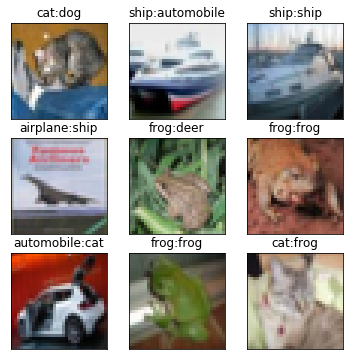

In [190]:
fig=plt.figure()
fig.set_size_inches(6,6)
for i in range(0,9):
    plt.subplot(3,3,i+1)
    plt.imshow(x_test[i],cmap='binary')
    plt.title(image_dictionary[np.argmax(y_test[i])]+':'
              +image_dictionary[predicted_classes[i]])
    plt.xticks([])
    plt.yticks([])
    
fig